## 12.4 Homework

### 1. Calculate a value for the integral

$$ I = \int_0 ^1 \frac{x^{-1/2}}{e^x + 1} dx $$

using the importance sampling method with $w(x) = x^{-1/2}$, with 1,000,000 random points.

where:

$$ f(x) = \frac{x^{-1/2}}{e^x + 1} $$

$$ w(x) = x^{-1/2} $$

The functions are plotted below.

C:\Users\durke\OneDrive\Documents\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  
C:\Users\durke\OneDrive\Documents\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys


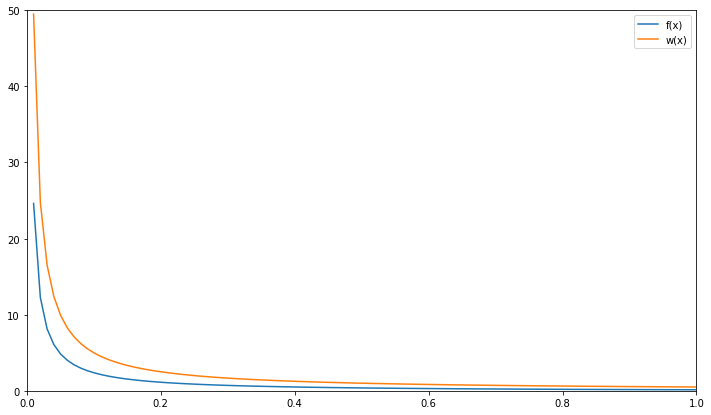

In [27]:
#Import relevant libraries from program.
import matplotlib.pyplot as plt
import numpy as np
import random as random
%matplotlib inline

#Define function and weighted function.
f = lambda x: 1/x**1/2/(np.exp(x)+1)
w = lambda x: 1/x**1/2

x = np.linspace(0, 1, 100)
yf = f(x)
yw = w(x)

#Plot the functions on graph.
plt.figure(figsize = (12, 7))
plt.plot(x, yf, label='f(x)')
plt.plot(x, yw, label='w(x)')
plt.xlim(0, 1)
plt.ylim(0,50)
plt.legend()
plt.show()


First, find probability density function from:

$$ p(x) = \frac {w(x)}{\int_0 ^1 w(x) dx} $$

$$ p(x) = \frac {x^{-1/2}}{2} $$

Now find cumulative distribution F(x) from p(x) by integrating from 0 to x, where

$ 0 < x < 1 $

$$ F(x) = \int_0^x \frac{1}{2x^{1/2}} dx $$

thus,

$$ F(x) = x^{1/2} $$

Now find the inverse function, $ F^{-1}(x) $

$$ F^{-1}(x) = x^2 $$

Now use the formula to approximate the area, from sampling $F^{-1}(x)$

$$ I \approx  \frac{1}{N} \sum_{i=1}^{N} \frac{f(x_i)}{w(x_i)} \int_a^b w(x)dx$$

In [14]:
from random import random 
from scipy.integrate import quad

#Define inverse cumulative distribution function.
f = lambda x: 1/np.sqrt(x)/(np.exp(x)+1)
w = lambda x: 1/np.sqrt(x)
F_inv = lambda x: x**2

#Mean value method function.
def IMC(N):
    #const is the weighted integral.
    const = quad(w, 0, 1)[0]
    I = 0
    for i in range(N):
        x = random()
        y = F_inv(x)
        I += f(y)/w(y)
    return I/N*const

print("The value for the integral for N = ", str(1000000), "is ", IMC(1000000))
print("Compare with scipy's quad integration function: ", quad(f, 0, 1)[0])


The value for the integral for N =  1000000 is  0.838930941628179
Compare with scipy's quad integration function:  0.8389329600133792


### 2. Calculate a value for the integral

$$ I = \int_0 ^1 \frac{x^{-1}}{e^x + 1} dx $$

using the importance sampling method with $w(x) = 1/x$, with 1,000,000 random points.

The function f(x) and the weighted function w(x) are plotted below as before.

C:\Users\durke\OneDrive\Documents\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  
C:\Users\durke\OneDrive\Documents\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys


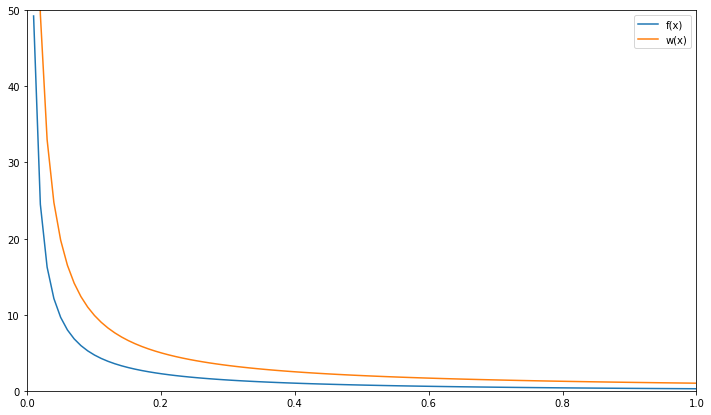

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import random as random
%matplotlib inline

#Define new functions f and weighted function w.
f = lambda x: 1/x/(np.exp(x)+1)
w = lambda x: 1/x

x = np.linspace(0, 1, 100)
yf = f(x)
yw = w(x)

#Plot the functions.
plt.figure(figsize = (12, 7))
plt.plot(x, yf, label='f(x)')
plt.plot(x, yw, label='w(x)')
plt.xlim(0, 1)
plt.ylim(0,50)
plt.legend()
plt.show()


We do the same procedure; find the probability density function p(x), then find the cumulative distribution F(x), and finally its inverse $F^-1(x)$. Then calculate the integral, sampling points from the inverse function.

$$ p(x) = \frac {w(x)}{\int_0 ^1 w(x) dx} $$

$$ p(x) = \frac {x^{-1}}{\int_0^1 x^{-1} dx} $$

$$ p(x) = \frac {1}{xln(1/0)} $$

This natural log value is undefined, so instead  approximate 0 with another value close to 0, say $10^{-20}$

$$ p(x) = \frac {x^{-1}}{\int_k^1 x^{-1} dx} $$ where k = 10^{-20}

In [23]:
k = 1/10**20
quad(w, k, 1)[0]

C:\Users\durke\OneDrive\Documents\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  


41.66910298846519

Make same approximation for F(x) calculation.

$$ p(x) \approx \frac {1}{41.66910298846519x} $$

$$ F(x) = \frac{1}{k}\int_k^x \frac {1}{x} dx $$

$$ F(x) = \frac{1}{k}(lnx-lnk) $$

$$ F^{-1}(x) = e^{kx+lnk} $$

Now sample points from the inverse function to calculate the integral.

In [36]:
from random import random 
from scipy.integrate import quad
from math import e, log

f2 = lambda x: 1/x/(np.exp(x)+1)
w2 = lambda x: 1/x
k = 1/10**20
F_inv2 = lambda x: pow(e, (k*x + log(k)))

def IMC2(N):
    #const is the weighted integral.
    const = quad(w2, k, 1)[0]
    I = 0
    for i in range(N):
        x = random()
        y = F_inv2(x)
        I += f2(y)/w2(y)
    return I/N*const


print("The value for the integral for N = ", str(1000000), "is ", IMC2(1000000))
print("Compare with scipy's quad integration function: ", quad(f2, 0, 1)[0])

C:\Users\durke\OneDrive\Documents\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  if sys.path[0] == '':


The value for the integral for N =  1000000 is  20.834551494232596
Compare with scipy's quad integration function:  20.594976039904015


C:\Users\durke\OneDrive\Documents\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
